# 多値分類


In [1]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas

データ読み込み

In [2]:
mnist = fetch_openml('mnist_784', version=1)
x_train, x_test = mnist['data'].iloc[:60000],mnist['data'].iloc[60000:]
y_train, y_test = mnist['target'].iloc[:60000],mnist['target'].iloc[60000:]
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)


In [3]:
sgd_clf = SGDClassifier(random_state=48)
sgd_clf.fit(x_train,y_train)
prediction = sgd_clf.predict(x_test)

In [4]:
result = np.zeros((10,10),dtype = np.int32)
for k in range(len(y_test)):
    i = prediction[k]
    j = y_test.iloc[k]
    result[i][j] += 1
result

array([[ 968,    0,   15,    4,    4,   22,   21,    3,   10,    8],
       [   0, 1086,    6,    0,    3,    1,    3,    4,    6,    4],
       [   0,    0,  660,    1,    1,    0,    5,    8,    1,    0],
       [   3,   20,  246,  974,   11,  265,   17,   17,  123,   27],
       [   0,    0,    9,    1,  857,    6,    7,    6,    9,   25],
       [   2,    1,    0,    1,    0,  497,   11,    0,    8,    1],
       [   2,    3,    5,    1,    4,   13,  873,    1,    3,    0],
       [   1,    2,   15,   13,    6,   11,    1,  946,   10,   51],
       [   3,   23,   66,    9,   30,   64,   20,   15,  794,   26],
       [   1,    0,   10,    6,   66,   13,    0,   28,   10,  867]],
      dtype=int32)

In [5]:
for i in range(10):
    c = 0
    for j in range(10):
        c += result[j][i]
    print(i, c, format(result[i][i]/c,'.5f'))

0 980 0.98776
1 1135 0.95683
2 1032 0.63953
3 1010 0.96436
4 982 0.87271
5 892 0.55717
6 958 0.91127
7 1028 0.92023
8 974 0.81520
9 1009 0.85927


一列目は0に対する判定、二列目は1に対する判定など。対角成分が正しい判定数。

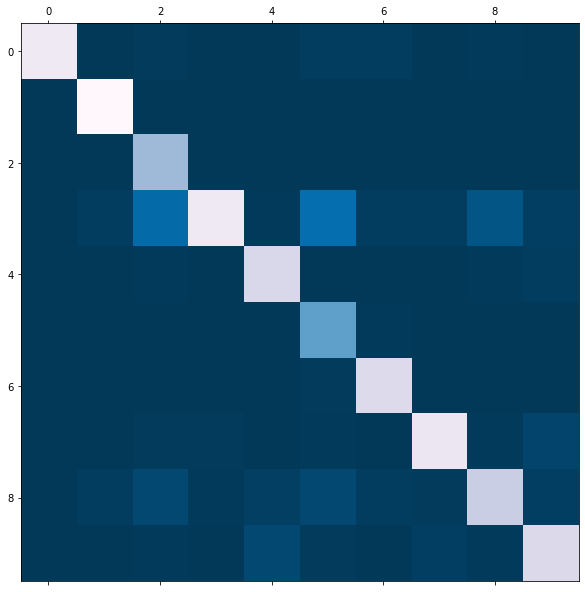

In [6]:
plt.figure(figsize=(10,10))
plt.matshow(result,cmap=plt.cm.PuBu_r,fignum=1)
plt.savefig('multiClass.pdf')
plt.show()